In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

from pydataset import data

from mall_wrangle import wrangle_mall_df

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


Clustering with the Iris Dataset
Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

In [3]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
X = df[['sepal_length', 'sepal_width']]
X.head()

,sepal_length,sepal_width
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6


In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [6]:
df['cluster'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


In [7]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,1.00
versicolor,5.936,2.770,4.260,1.326,1.52
virginica,6.588,2.974,5.552,2.026,0.60


[Text(0.5, 1.0, 'K-Means Clusters')]

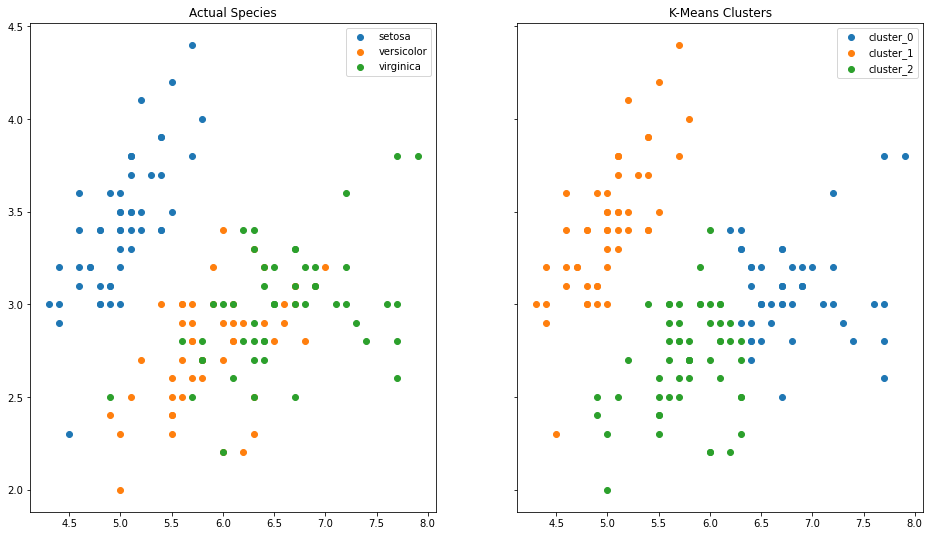

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    axs[0].scatter(subset.sepal_length, subset.sepal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in df.cluster.sort_values().unique():
    axs[1].scatter(df[df.cluster == cluster_n].sepal_length, df[df.cluster == cluster_n].sepal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

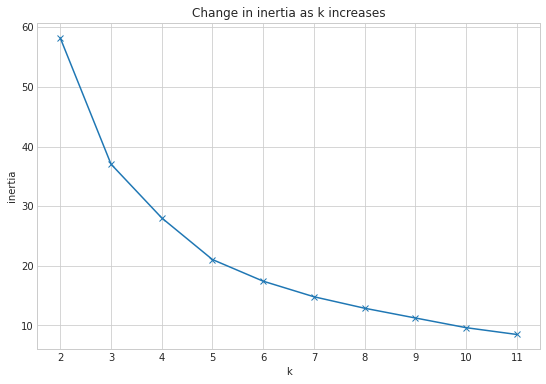

In [16]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

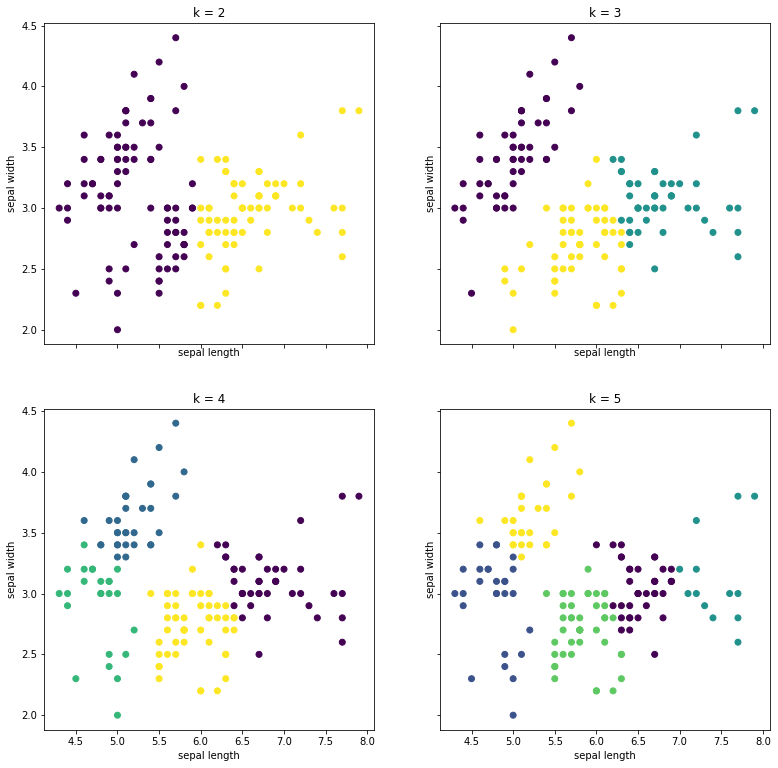

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.sepal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='sepal width')

- Repeat the clustering, this time with 3 different features.

In [18]:
X = df[['sepal_length', 'petal_width', 'sepal_width']]
X.head()

,sepal_length,petal_width,sepal_width
1,5.1,0.2,3.5
2,4.9,0.2,3.0
3,4.7,0.2,3.2
4,4.6,0.2,3.1
5,5.0,0.2,3.6


In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [20]:
df['three_feature_cluster'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,three_feature_cluster
1,5.1,3.5,1.4,0.2,setosa,1,1
2,4.9,3.0,1.4,0.2,setosa,1,1
3,4.7,3.2,1.3,0.2,setosa,1,1
4,4.6,3.1,1.5,0.2,setosa,1,1
5,5.0,3.6,1.4,0.2,setosa,1,1


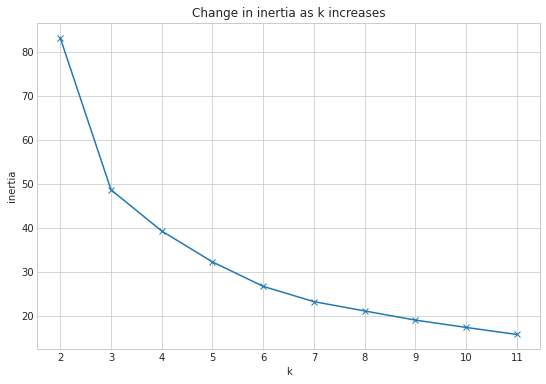

In [21]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

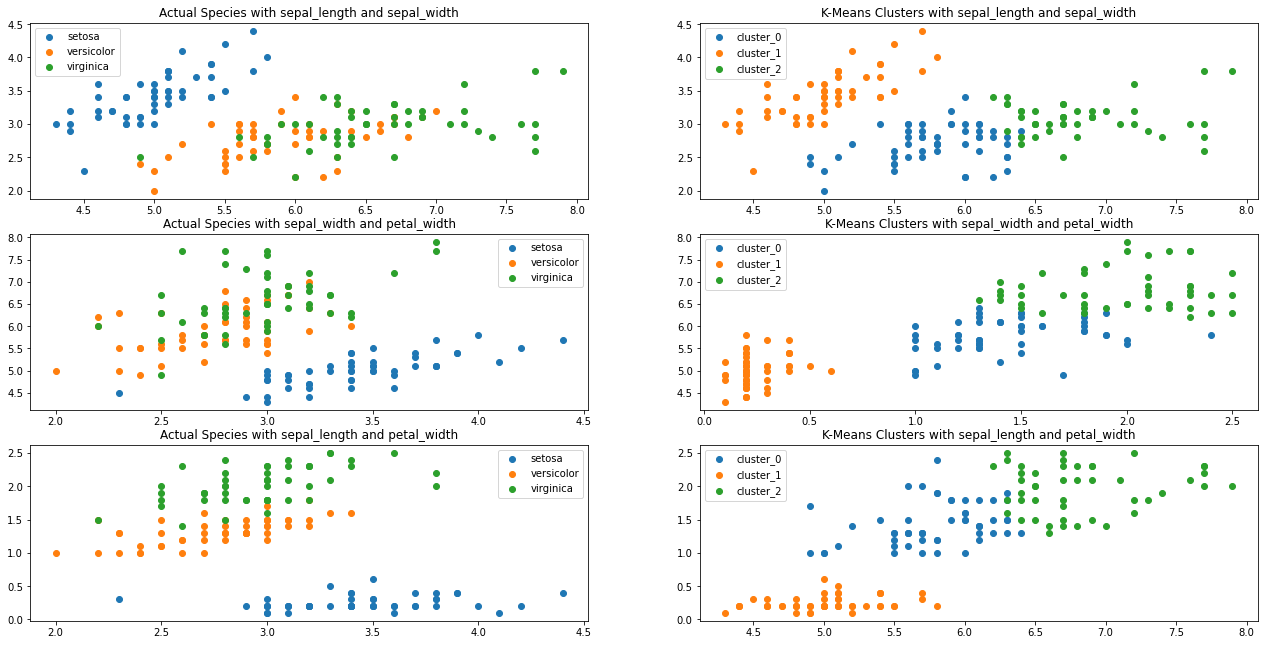

In [23]:
fig, axs = plt.subplots(3, 2, figsize=(22, 11))

for species, subset in df.groupby('species'):
    axs[0,0].scatter(subset.sepal_length, subset.sepal_width, label=species)
    
axs[0,0].legend()
axs[0,0].set(title='Actual Species with sepal_length and sepal_width')
    
for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[0,1].scatter(df[df.three_feature_cluster == cluster_n].sepal_length, df[df.three_feature_cluster == cluster_n].sepal_width, label=f'cluster_{cluster_n}')

axs[0,1].legend()
axs[0,1].set(title="K-Means Clusters with sepal_length and sepal_width")

for species, subset in df.groupby('species'):
    axs[1,0].scatter(subset.sepal_width, subset.sepal_length, label=species)
    
axs[1,0].legend()
axs[1,0].set(title='Actual Species with sepal_width and petal_width')

for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[1,1].scatter(df[df.three_feature_cluster == cluster_n].petal_width, df[df.three_feature_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[1,1].legend()
axs[1,1].set(title="K-Means Clusters with sepal_width and petal_width")

for species, subset in df.groupby('species'):
    axs[2,0].scatter(subset.sepal_width, subset.petal_width, label=species)
    
axs[2,0].legend()
axs[2,0].set(title='Actual Species with sepal_length and petal_width')

for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[2,1].scatter(df[df.three_feature_cluster == cluster_n].sepal_length, df[df.three_feature_cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[2,1].legend()
axs[2,1].set(title="K-Means Clusters with sepal_length and petal_width")

plt.show()

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [24]:
scaler, train, validate, test = wrangle_mall_df()
train.head()

,age,annual_income,spending_score,is_male
customer_id,,,,
182,32,97,86,0
49,29,40,42,0
35,49,33,14,0
186,30,99,97,1
114,19,64,46,1


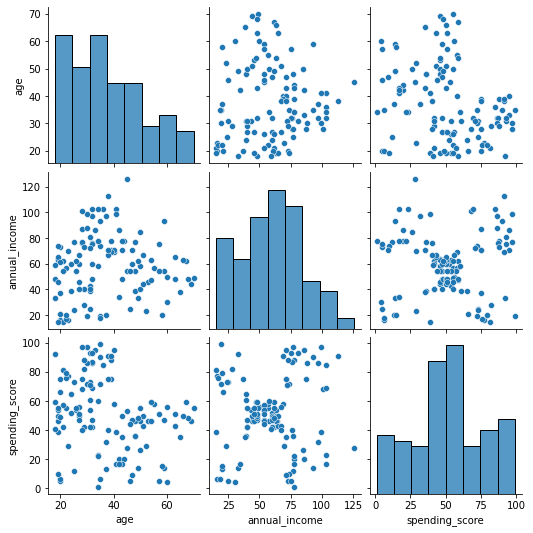

In [25]:
sns.pairplot(train.drop(columns='is_male'))

In [26]:
X = train[['spending_score', 'annual_income', 'age']]
X.head()

,spending_score,annual_income,age
customer_id,,,
182,86,97,32
49,42,40,29
35,14,33,49
186,97,99,30
114,46,64,19


In [27]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters


array([3, 1, 2, 3, 1, 1, 3, 4, 0, 0, 0, 3, 1, 2, 4, 0, 4, 4, 4, 0, 2, 1,
       4, 2, 1, 2, 0, 1, 2, 1, 4, 1, 1, 3, 1, 1, 1, 4, 1, 0, 1, 4, 4, 1,
       1, 1, 1, 4, 4, 2, 0, 3, 3, 1, 4, 4, 1, 2, 4, 1, 1, 1, 3, 2, 3, 1,
       1, 3, 3, 1, 3, 3, 2, 1, 1, 4, 3, 3, 1, 1, 1, 1, 3, 1, 1, 0, 2, 1,
       1, 0, 1, 1, 1, 3, 1, 0, 1, 3, 0, 1, 0, 1, 1, 4, 1, 2, 4, 3, 1, 1,
       4, 4, 3, 1, 3, 4, 3, 1], dtype=int32)

In [28]:
train['cluster'] = clusters
train.head()

,age,annual_income,spending_score,is_male,cluster
customer_id,,,,,
182,32,97,86,0,3
49,29,40,42,0,1
35,49,33,14,0,2
186,30,99,97,1,3
114,19,64,46,1,1


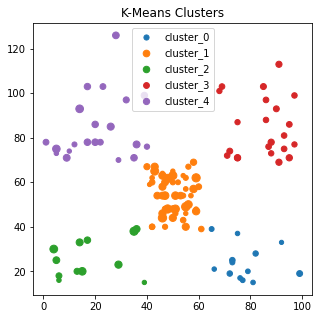

In [45]:
plt.figure(figsize=(5, 5))

for cluster_n in train.cluster.sort_values().unique():
    plt.scatter(train[train.cluster == cluster_n].spending_score, train[train.cluster == cluster_n].annual_income, train[train.cluster == cluster_n].age, label=f'cluster_{cluster_n}')

plt.legend()
plt.title("K-Means Clusters")
plt.show()

In [30]:
train.head()

,age,annual_income,spending_score,is_male,cluster
customer_id,,,,,
182,32,97,86,0,3
49,29,40,42,0,1
35,49,33,14,0,2
186,30,99,97,1,3
114,19,64,46,1,1


In [31]:
train2 = train.drop(columns='cluster').copy()

In [32]:
train2.head()

,age,annual_income,spending_score,is_male
customer_id,,,,
182,32,97,86,0
49,29,40,42,0
35,49,33,14,0
186,30,99,97,1
114,19,64,46,1


In [33]:
scaler = MinMaxScaler()

scaler.fit(train2)

train_scaled = scaler.transform(train2)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

train_scaled

array([[0.26923077, 0.73873874, 0.86734694, 0.        ],
       [0.21153846, 0.22522523, 0.41836735, 0.        ],
       [0.59615385, 0.16216216, 0.13265306, 0.        ],
       [0.23076923, 0.75675676, 0.97959184, 1.        ],
       [0.01923077, 0.44144144, 0.45918367, 1.        ],
       [0.51923077, 0.35135135, 0.53061224, 0.        ],
       [0.34615385, 0.79279279, 0.85714286, 0.        ],
       [0.78846154, 0.7027027 , 0.13265306, 1.        ],
       [0.11538462, 0.21621622, 0.65306122, 0.        ],
       [0.03846154, 0.1981982 , 0.75510204, 0.        ],
       [0.32692308, 0.03603604, 1.        , 0.        ],
       [0.19230769, 0.64864865, 0.75510204, 1.        ],
       [0.11538462, 0.40540541, 0.52040816, 1.        ],
       [0.53846154, 0.09009009, 0.04081633, 0.        ],
       [0.46153846, 0.63963964, 0.19387755, 1.        ],
       [0.03846154, 0.05405405, 0.66326531, 1.        ],
       [0.13461538, 0.55855856, 0.1122449 , 1.        ],
       [0.03846154, 0.52252252,

In [35]:
train_scaled = pd.DataFrame(train_scaled, columns=train2.columns.values).set_index([train2.index.values])
validate_scaled = pd.DataFrame(validate_scaled, columns=validate.columns.values).set_index([validate.index.values])
test_scaled = pd.DataFrame(test_scaled, columns=test.columns.values).set_index([test.index.values])

In [36]:
train_scaled.head()

,age,annual_income,spending_score,is_male
182,0.269231,0.738739,0.867347,0.0
49,0.211538,0.225225,0.418367,0.0
35,0.596154,0.162162,0.132653,0.0
186,0.230769,0.756757,0.979592,1.0
114,0.019231,0.441441,0.459184,1.0


In [ ]:
sns.pairplot(train_scaled.drop(columns='is_male'))

In [38]:
X = train_scaled[['spending_score', 'annual_income', 'age']]
X.head()

,spending_score,annual_income,age
182,0.867347,0.738739,0.269231
49,0.418367,0.225225,0.211538
35,0.132653,0.162162,0.596154
186,0.979592,0.756757,0.230769
114,0.459184,0.441441,0.019231


In [39]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 2, 4, 0, 2, 1, 0, 3, 2, 2, 2, 0, 2, 4, 3, 2, 3, 3, 3, 2, 4, 1,
       3, 4, 2, 1, 2, 2, 4, 1, 3, 2, 2, 0, 1, 2, 1, 3, 0, 2, 1, 3, 3, 1,
       2, 1, 1, 3, 3, 2, 2, 0, 0, 2, 3, 3, 1, 4, 3, 2, 1, 1, 0, 4, 0, 1,
       1, 0, 0, 1, 0, 0, 4, 1, 2, 3, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 3, 3, 1, 3, 0, 1, 2,
       3, 3, 0, 1, 0, 3, 0, 2], dtype=int32)

In [40]:
train_scaled['cluster'] = clusters
train_scaled.head()

,age,annual_income,spending_score,is_male,cluster
182,0.269231,0.738739,0.867347,0.0,0
49,0.211538,0.225225,0.418367,0.0,2
35,0.596154,0.162162,0.132653,0.0,4
186,0.230769,0.756757,0.979592,1.0,0
114,0.019231,0.441441,0.459184,1.0,2


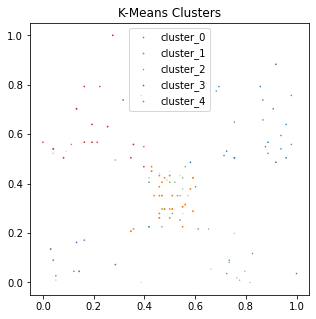

In [43]:
plt.figure(figsize=(5, 5))

for cluster_n in train_scaled.cluster.sort_values().unique():
    plt.scatter(train_scaled[train_scaled.cluster == cluster_n].spending_score, 
                train_scaled[train_scaled.cluster == cluster_n].annual_income,
                train_scaled[train_scaled.cluster == cluster_n].age,
                label=f'cluster_{cluster_n}'
               )

plt.legend()
plt.title("K-Means Clusters")
plt.show()

In [49]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [47]:
df = pd.read_csv('zillow2.csv')
df.head()

,Unnamed: 0,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc
0,0,14297519,261.0,1727539,3.5,4.0,3.5,3100.0,3100.0,6059.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,Single Family Residential,NaN
1,1,17052889,261.0,1387261,1.0,2.0,1.0,1465.0,1465.0,6111.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,Single Family Residential,NaN
2,2,14186244,261.0,11677,2.0,3.0,2.0,1243.0,1243.0,6059.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,Single Family Residential,NaN
3,3,12177905,261.0,2288172,3.0,4.0,3.0,2376.0,2376.0,6037.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Single Family Residential,Central
4,4,12095076,261.0,781532,3.0,4.0,3.0,2962.0,2962.0,6037.0,...,773303.0,2016.0,496619.0,9516.26,6.037461e+13,6,-0.001011,2017-01-01,Single Family Residential,Central


In [50]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

train observations:  997220
validate observations:  427380
test observations:  356184


In [57]:
X = df[['bathroomcnt', 'calculatedfinishedsquarefeet']]
X.head()

,bathroomcnt,calculatedfinishedsquarefeet
0,3.5,3100.0
1,1.0,1465.0
2,2.0,1243.0
3,3.0,2376.0
4,3.0,2962.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52376 entries, 0 to 52375
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52376 non-null  int64  
 1   parcelid                      52376 non-null  int64  
 2   propertylandusetypeid         52376 non-null  float64
 3   id                            52376 non-null  int64  
 4   bathroomcnt                   52376 non-null  float64
 5   bedroomcnt                    52376 non-null  float64
 6   calculatedbathnbr             52304 non-null  float64
 7   calculatedfinishedsquarefeet  52359 non-null  float64
 8   finishedsquarefeet12          52194 non-null  float64
 9   fips                          52376 non-null  float64
 10  fullbathcnt                   52304 non-null  float64
 11  latitude                      52376 non-null  float64
 12  longitude                     52376 non-null  float64
 13  l

In [58]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [55]:
df['cluster'] = clusters
df.head()

,Unnamed: 0,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc,cluster
0,0,14297519,261.0,1727539,3.5,4.0,3.5,3100.0,3100.0,6059.0,...,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,Single Family Residential,NaN,0
1,1,17052889,261.0,1387261,1.0,2.0,1.0,1465.0,1465.0,6111.0,...,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,Single Family Residential,NaN,1
2,2,14186244,261.0,11677,2.0,3.0,2.0,1243.0,1243.0,6059.0,...,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,Single Family Residential,NaN,1
3,3,12177905,261.0,2288172,3.0,4.0,3.0,2376.0,2376.0,6037.0,...,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Single Family Residential,Central,0
4,4,12095076,261.0,781532,3.0,4.0,3.0,2962.0,2962.0,6037.0,...,2016.0,496619.0,9516.26,6.037461e+13,6,-0.001011,2017-01-01,Single Family Residential,Central,0


KeyError: 'species'

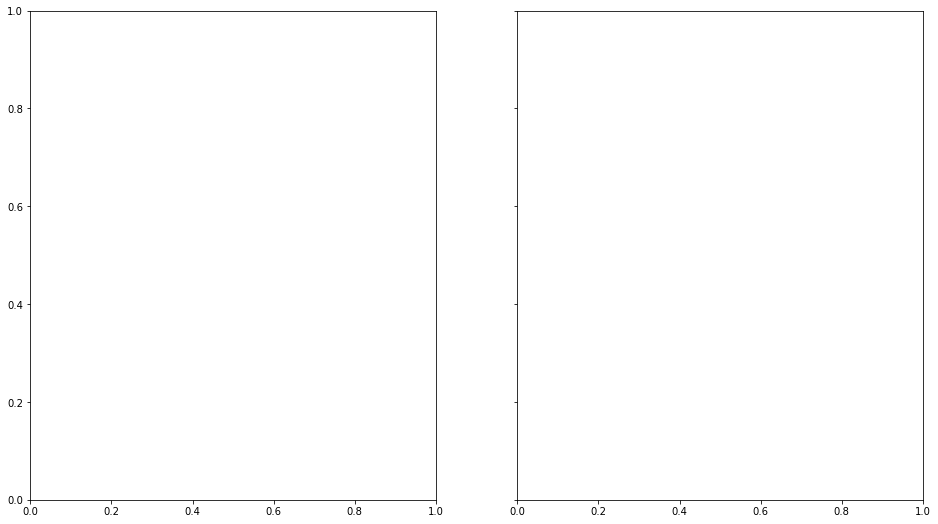

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    axs[0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in df.cluster.sort_values().unique():
    axs[1].scatter(df[df.cluster == cluster_n].petal_length, df[df.cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")